In [5]:
import glob
import io
import os
from scipy.io import wavfile
import numpy as np
import IPython
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageTk
import librosa
import librosa.display

import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors

from utilities import *

In [ ]:
#pd.DataFrame(data_test.iloc[1])
#x = np.arange(0, 250, 0.5)
#y = list(data_test.iloc[14])[2:]
#plt.plot(x, y)

Sound_Violin    700
Sound_Drum      700
Sound_Guitar    700
Sound_Piano     529
Name: Class, dtype: int64


/nix/store/vjdd5f3qwrkz61qvl8fhpvi931k5xqcd-python3-3.9.6-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


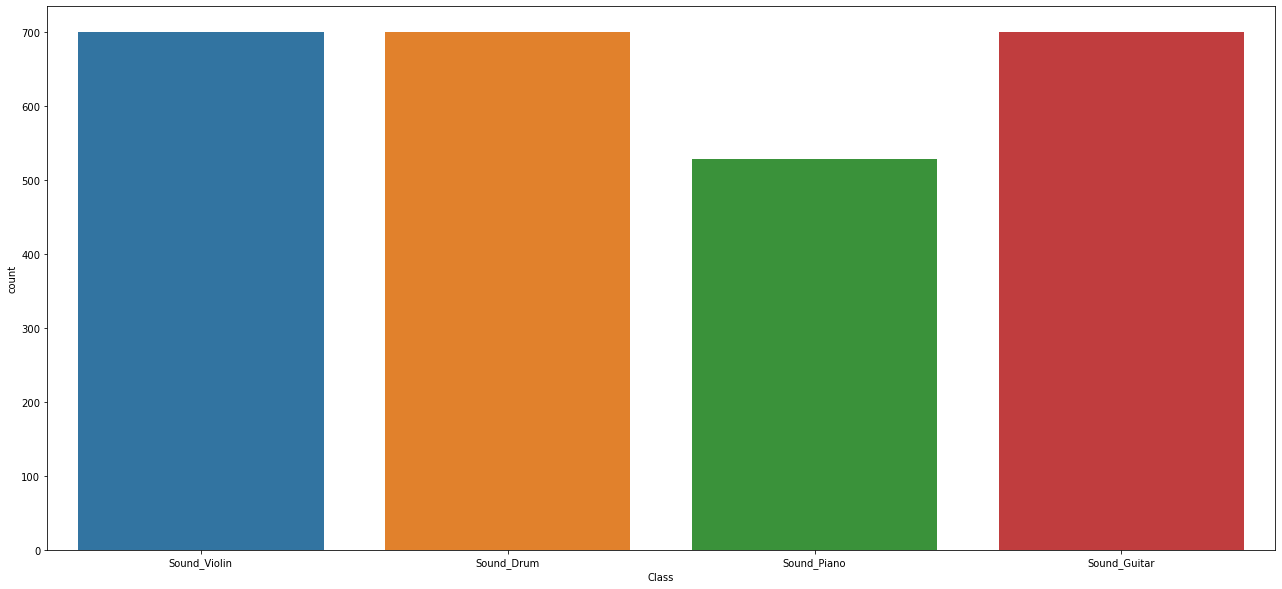

In [6]:
df = load_train(700,maxfreq=5000)

print(df['Class'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['Class'])
plt.xticks(rotation=0)

plt.show()

In [7]:
df

,FileName,Class,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
1929,Violin_Sound (264).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
1930,13_ko-donghwi_bwv1001.wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
1931,Violin_Sound (280).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
1932,violin_sounds (40).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
1933,violin_sound (197).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,slow_rock_8_100BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
696,slow_ska_1_150BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
697,slow_ska_2_150BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
698,slow_ska_3_150BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042


In [8]:
df.to_csv('test_feature_extract.csv', encoding='utf-8')

In [10]:
df2 = pd.read_csv("test_feature_extract.csv")

In [11]:
df2

,Unnamed: 0,FileName,Class,0.0,0.5,1.0,1.5,2.0,2.5,3.0,...,2495.0,2495.5,2496.0,2496.5,2497.0,2497.5,2498.0,2498.5,2499.0,2499.5
0,1929,Violin_Sound (264).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
1,1930,13_ko-donghwi_bwv1001.wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
2,1931,Violin_Sound (280).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
3,1932,violin_sounds (40).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
4,1933,violin_sound (197).wav,Sound_Violin,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,695,slow_rock_8_100BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
2625,696,slow_ska_1_150BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
2626,697,slow_ska_2_150BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042
2627,698,slow_ska_3_150BPM.wav,Sound_Guitar,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,...,0.000047,0.000045,0.000044,0.000044,0.000045,0.000045,0.000043,0.000042,0.000041,0.000042


In [22]:
X_train = df['FileName']
y_train = df['Class']

In [24]:
X_train

1929                             Violin_Sound (264).wav
1930                          13_ko-donghwi_bwv1001.wav
1931                             Violin_Sound (280).wav
1932                             violin_sounds (40).wav
1933                             violin_sound (197).wav
700                                        04-47367.wav
701          046578_tribal-drum-rhythms-03wav-68096.wav
702     054399_8039s-old-school-rap-drum-loop-80433.wav
703                               056514_drum-40118.wav
704          059960_sonido2-sincopa-alta-7mp3-47316.wav
1400                029500_morning-rain-piano-65875.wav
1401                     035568_upright-piano-71570.wav
1402                     another-sadmosphere-108461.wav
1403                              arpeggio-01-36024.wav
1404              beautiful-random-minor-arp-119378.wav
0                                     1-E1-Major 00.wav
1                                     1-E1-Major 01.wav
2                                     1-E1-Major

In [23]:
varianceExplained = 0.95
preProc = sklearn.decomposition.PCA(n_components=0.95) ## TODO: fixer les hyper-parametres de cette transformation
preProc.fit(X_train,y_train) ## TODO: à éditer pour que ça marche

ValueError: could not convert string to float: 'Violin_Sound (264).wav'

In [ ]:
CumulativeExplainedVariance = np.cumsum(preProc.explained_variance_ratio_)
plt.plot(CumulativeExplainedVariance, marker='+', label="ensemble de ?? TODO ??")
plt.xlabel("?? TODO ??")
plt.ylabel(" ?? TODO ??")
plt.ylim([0,1])
plt.legend()

In [ ]:
gsignal, grate = librosa.load("./dataset/Train_submission/Train_submission/"+guitar["FileName"][0])
dsignal, drate = librosa.load("./dataset/Train_submission/Train_submission/"+drum["FileName"][700])
vsignal, vrate = librosa.load("./dataset/Train_submission/Train_submission/"+violin["FileName"][1929])
psignal, prate = librosa.load("./dataset/Train_submission/Train_submission/"+piano["FileName"][1400])

In [16]:
fg = calc_fft(gsignal,grate)
fd = calc_fft(dsignal,drate)
fv = calc_fft(vsignal,vrate)
fp = calc_fft(psignal,prate)

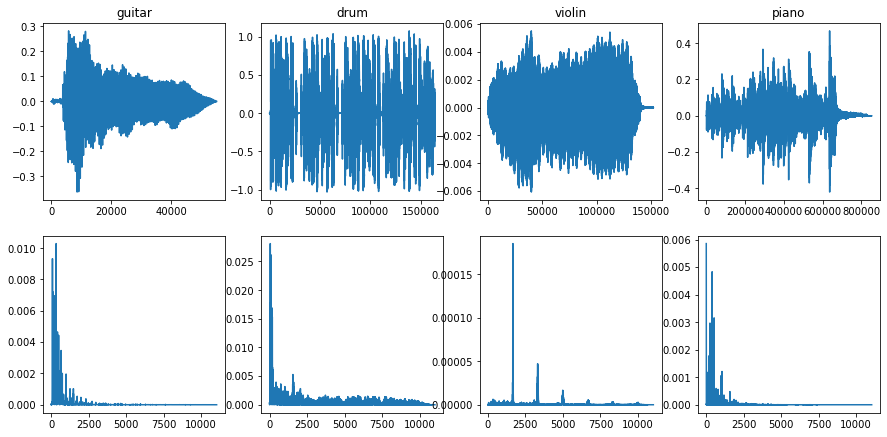

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4,4,1)
bx = fig.add_subplot(4,4,2)
cx = fig.add_subplot(4,4,3)
dx = fig.add_subplot(4,4,4)
ax2 = fig.add_subplot(4,4,5)
bx2 = fig.add_subplot(4,4,6)
cx2 = fig.add_subplot(4,4,7)
dx2 = fig.add_subplot(4,4,8)

ax.plot(gsignal)
bx.plot(dsignal)
cx.plot(vsignal)
dx.plot(psignal)
ax2.plot(fg[0],fg[1])
bx2.plot(fd[0],fd[1])
cx2.plot(fv[0],fv[1])
dx2.plot(fp[0],fp[1])
ax.set_title("guitar")
bx.set_title("drum")
cx.set_title("violin")
dx.set_title("piano");

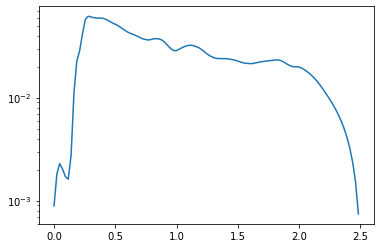

In [18]:
librosa.feature.rms(y=gsignal)
S, phase = librosa.magphase(librosa.stft(gsignal))
rms = librosa.feature.rms(S=S)
times = librosa.times_like(rms)
plt.semilogy(times, rms[0], label='RMS Energy')

In [19]:
y, sr = librosa.load("./dataset/Train_submission/Train_submission/"+piano["FileName"][1400])
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

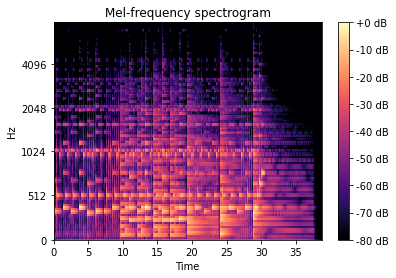

In [20]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')